# cycsat demo
Cycsat is a synthetic satellite image generator for cyclus. This tool can be used to generate synthetic satellite timeseries for cyclus simulations.

In [1]:
from cycsat.simulation import Simulator
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load a cyclus simulation
sim = Simulator('reactor_test_sample.sqlite')

# load a template
from cycsat.prototypes.ByronIL import ByronIL
temps = {'Reactor1': ByronIL}

# create three builds using the template
sim.create_build(name='build 1',templates=temps)
sim.create_build(name='build 2',templates=temps)
sim.create_build(name='build 3',templates=temps)

# examnine sites for each build
sim.Site()[['AgentId','name','prototype','template']]

assemble 5 -1
assemble 6 -1
assemble 7 -1


,AgentId,name,prototype,template
0,19,"Byron, IL",Reactor1,ByronIL
1,19,"Byron, IL",Reactor1,ByronIL
2,19,"Byron, IL",Reactor1,ByronIL
3,19,"Byron, IL",Reactor1,ByronIL
4,19,"Byron, IL",Reactor1,ByronIL
5,19,"Byron, IL",Reactor1,ByronIL
6,19,"Byron, IL",Reactor1,ByronIL


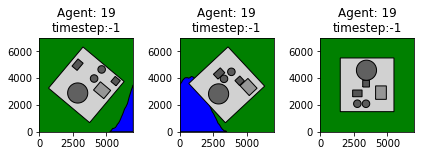

In [3]:
# plot the builds of these sites
fig, axes = plt.subplots(1,3)
for i, ax in enumerate(axes):
    sim.load_build(i+1).sites[0].plot(ax=ax)
plt.tight_layout()

In [4]:
# select the best build and simulate to produce time series data
selected_build = sim.load_build(2)
simulation = selected_build.simulate()

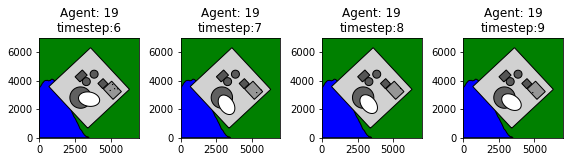

In [5]:
# plot the site at a range of timesteps for the selected site
site = simulation.build.sites[0]

fig, axes = plt.subplots(1,4,figsize=(8,3))
plt.tight_layout()

for i,x in enumerate(range(6,10)):
    site.plot(ax=axes[i],simulation=simulation,timestep=x)

In [6]:
simulation.gif(name='example',fps=5)

![alt text](example.gif "example gif")

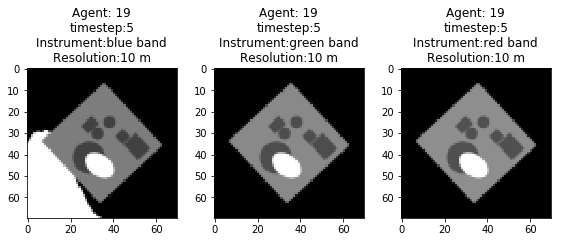

In [7]:
# import satellite instruments to create images
from cycsat.prototypes.instrument import Blue, Green, Red

fig, axes = plt.subplots(1,3,figsize=(8,4))
plt.tight_layout()

# capture images with different instruments
for i,instrument in enumerate([Blue, Green, Red]):
    sensor = instrument()
    sensor.calibrate(site)
    sensor.mmu = 100 
    sensor.plot(ax=axes[i],simulation=simulation,timestep=5)

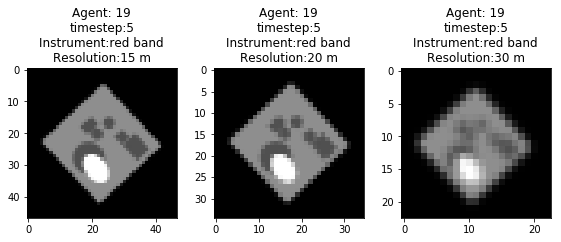

In [12]:
fig, axes = plt.subplots(1,3,figsize=(8,4))
plt.tight_layout()

# capture images with different resolutions
for i,mmu in enumerate([150, 200, 300]):
    sensor.mmu = mmu
    sensor.plot(ax=axes[i],simulation=simulation,timestep=5)

In [14]:
# examine the observables at the site
site.observables

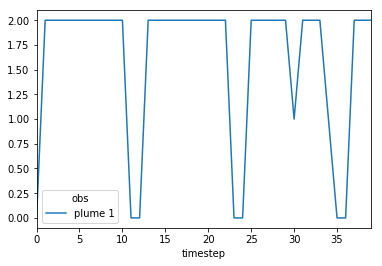

In [9]:
# track events at the site across the simulation
events = pd.DataFrame([{'timestep':e.timestep,'obs':e.observable.name} for e in site.features])
log = events.groupby(['timestep','obs']).size().reset_index().pivot('timestep','obs',0).fillna(0)
log[['plume 1']].plot()